**Getting the data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)
%matplotlib inline

In [2]:
df=pd.read_csv('dataset_\Final database.csv')
#df=pd.read_csv('dataset_/Final database.csv')

In [3]:
df.head(10)

,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

In [4]:
print('Dataset: ', df.shape[0], 'Rows with', df.shape[1], 'Features')

Dataset:  170633 Rows with 151 Features


**Exploratory data analysis**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Columns: 151 entries, Country to Cluster
dtypes: float64(58), int64(65), object(28)
memory usage: 196.6+ MB


In [6]:
# Get a first overview of the missing data
df.isna().sum()

Country                    0
Uri                        0
Popularity                 0
Title                      0
Artist                     0
Album/Single               0
Genre                      0
Artist_followers          41
Explicit                   0
Album                      0
Release_date               0
Track_number               0
Tracks_in_album            0
danceability               0
energy                     0
key                        0
loudness                   0
mode                       0
speechiness                0
acoustics                  0
instrumentalness           0
liveliness                 0
valence                    0
tempo                      0
duration_ms                0
time_signature             0
Genre_new                  0
Days_since_release      3222
Released_after_2017     3222
Explicit_false             0
Explicit_true              0
album                      0
compilation                0
single                     0
bolero        

In [7]:
# Show missing values in percentage
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
anger_norm2,58.160497
trust_norm2,58.160497
anticipation_norm2,58.160497
disgust_norm2,58.160497
fear_norm2,58.160497
joy_norm2,58.160497
surprise_norm2,58.160497
sadness_norm2,58.160497
negative_norm2,58.127091
positive_norm2,58.127091


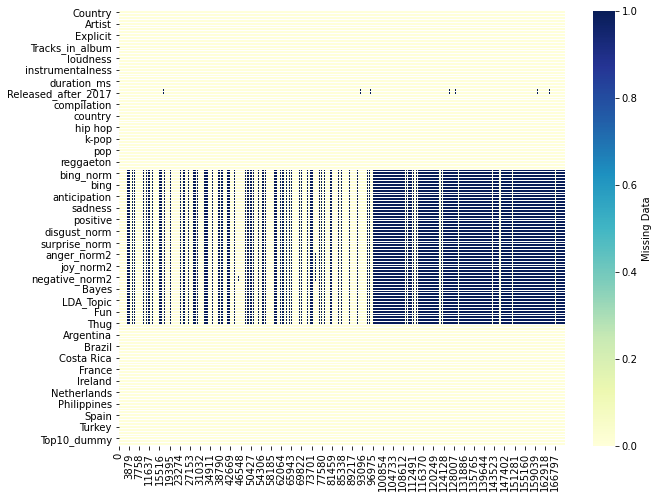

In [8]:
# Missing value in a heatmap
# TODO: Some columns are missing in this plot
# After converting some NaN strings to np.NaN values we need to do this again
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})

In [9]:
# Finding number of duplicated values on the dataset
df.duplicated().sum()

0

**Cleaning the data**

In [10]:
# Rename genre columns
df.rename(columns={'Genre': 'sub_genre', 'Genre_new': 'genre'}, inplace=True)

In [11]:
# Get overview of genres colums and combine them if they match each other
df_genre = df[['genre', 'sub_genre', 'dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
               'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap',	'reggae', 'reggaeton', 
               'rock', 'trap', 'bolero', 'boy band', 'country']]
genre = df[['genre', 'sub_genre']]
df_genre.sample(n=50)

# Check if genre columns can be dropped or not
all_genre = df[['dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
            'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap',	'reggae', 'reggaeton',
            'rock', 'trap', 'bolero', 'boy band', 'country']]

genre['check_genre'] = all_genre @ all_genre.columns
genre['equals'] = genre['genre'].equals(genre['check_genre'])
print(f'All rows are the same: {all(genre["equals"])}')
genre.sample(n=10)

All rows are the same: True


,genre,sub_genre,check_genre,equals
127180,rock,classic rock,rock,True
150211,else,n-a,else,True
97025,hip hop,manchester hip hop,hip hop,True
27638,boy band,boy band,boy band,True
92107,r&b/soul,classic soul,r&b/soul,True
5471,hip hop,deep german hip hop,hip hop,True
28669,pop,pop rap,pop,True
141996,indie,francoton,indie,True
71718,hip hop,atl hip hop,hip hop,True
63423,rap,k-rap,rap,True


In [12]:
# Drop genre columns
df.drop(columns=['dance/electronic', 'else', 'funk', 'hip hop',	'house', 'indie',
                 'jazz', 'k-pop', 'latin', 'metal', 'opm', 'pop', "r&b/soul", 'rap', 'reggae', 'reggaeton',
                 'rock', 'trap', 'bolero', 'boy band', 'country'], inplace=True)

We have a genre that is called *else*, where unknown gerne types are stored. Also There is a n-a string in the subgenre feature that needs to be cleaned. We first convert all the missing data to NaN values and then overview the data again. 

In [13]:
# Set else values in genre or sub genre to NaN values
df['genre'][df['genre'].str.contains('else')] = np.NaN
df['sub_genre'][df['sub_genre'].str.contains('n-a')] = np.NaN

We can see that in the subgenre column we also have normal gernes like pop or hiphop, that are also in the genres column.

In [14]:
# Cleaning album/single and compilation columns
condition = (df['compilation'] == 1) & ((df['single'] == 1) | (df['album'] == 1))
compare_cols = np.where(condition, True, False)
print(f'Are there any rows where we have a single or album and a compilation? {any(compare_cols)}')
release_type = df[['compilation', 'single', 'album']]

Are there any rows where we have a single or album and a compilation? False


In [15]:
# Drop album, single, compilation and rename Album/Single column
df.drop(columns=['album', 'single', 'compilation'], inplace=True)
df.rename(columns={'Album/Single': 'release_type'}, inplace=True)  # Consisting of album, single, compilation categories
df.sample(n=10)

,Country,Uri,Popularity,Title,Artist,release_type,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
92461,Ireland,https://open.spotify.com/track/5fX2oPyLCe5mBKq...,7045.60,when you love someone,James TW,single,neo mellow,702106.0,False,First Impressions,2016-04-15,3,6,0.68,0.446,7,-6.039,1,0.0281,0.256,0,0.0515,0.339,125.863,216373,4,indie,1665.0,0.0,1,0,1.0,1.0,1.0,-1.0,0.75,1.0,8.0,-1.0,1.0,0.0,1.0,1.0,1.0,3.0,0.0,0.0,3.0,2.0,253.0,0.003953,0.000000,0.003953,0.003953,0.003953,0.011858,0.000000,0.000000,0.011858,0.007905,0.142857,0.000000,0.142857,0.142857,0.142857,0.428571,0.000000,0.000000,0.600000,0.400000,4.0,12.0,-1.0,1.0,0.0,0.0,Love,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,114,0.0,0.0,english speaking and nordic
35107,France,https://open.spotify.com/track/107CfwBqfICzcKu...,326.05,tragic endings,Eminem - Skylar Grey,album,detroit hip hop,39078037.0,True,Revival,2017-12-15,11,19,0.634,0.771,4,-4.957,0,0.295,0.429,0.0,0.689,0.522,80.971,252027,4,hip hop,1065.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,0.0,0.0,southern europe and portuguese heritage
91362,New Zealand,https://open.spotify.com/track/6A9mKXlFRPMPem6...,144.80,three little birds,Bob Marley & The Wailers,album,reggae,8781395.0,False,Exodus (Deluxe Edition),1977-01-03,9,25,0.814,0.482,9,-10.493,1,0.0588,0.0111,1.57e-06,0.0476,0.615,148.404,180267,4,reggae,16012.0,0.0,1,0,1.0,1.0,-1.0,0.0,1.80,2.0,-2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,166.0,0.000000,0.012048,0.000000,0.006024,0.006024,0.006024,0.006024,0.006024,0.006024,0.006024,0.000000,0.285714,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.500000,0.500000,2.0,8.0,-1.0,1.0,0.0,0.0,Desire,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,161,0.0,0.0,english speaking and nordic
158551,Poland,https://open.spotify.com/track/6QfmG4YHNt2PjXu...,33.60,disco noir,TEDE - Sir Mich - PlanBe,album,polish hip hop,70077.0,True,DISCO NOIR,2020-06-04,1,13,0.879,0.688,6,-5.525,1,0.216,0.073,1.16e-06,0.153,0.744,113.996,191744,4,hip hop,163.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,167,0.0,0.0,english speaking and nordic
21801,France,https://open.spotify.com/track/4V6MRo0CEAC9MwA...,928.00,real friends,Camila Cabello,sin

*Convert miliseconds feature to seconds for better readability* 

In [16]:
# Some string values in duration that prevent conversion
df['duration_ms'].loc[91952:91970]  # First sequence of missing values

91952    255507
91953    172309
91954    268747
91955    268747
91956        n
91957        n
91958        n
91959        n
91960        n
91961        n
91962        n
91963        n
91964        n
91965        n
91966        n
91967        n
91968    191840
91969    191840
91970    256400
Name: duration_ms, dtype: object

In [17]:
# Convert these values to NaN values 
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['duration_ms'].isnull().sum()

19

In [18]:
# Possibility of takeing average numeric value for the 19 missing values
df['duration_ms'].fillna(df['duration_ms'].mean(), inplace=True)
df['duration_ms'].isnull().sum()


0

In [19]:
# Convert ms to min 
df['duration_min'] = df['duration_ms']/60000
df.drop(columns=['duration_ms'], inplace=True)

There is more missing or broken values in some of the music features. Lets replace them first with NaN values.

In [20]:
# Found again missing values in music features 
df[df.eq('n\x07').any(axis=1)]
df.replace({'n\x07': np.NaN}, inplace=True)

In [21]:
# Change correct datatypes of some columns
df[['danceability', 'energy','loudness', 'speechiness', 
   'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo']] = df[['danceability', 'energy', 'loudness', 'speechiness',
                                                                                               'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo' ]].apply(pd.to_numeric)
# Type conversion for the integer columns doesnt seem to work 
df = df.astype({'mode': int, 'key': int, 'time_signature': int}, errors='ignore')  # Cant convert NaN values to int, so ignore them
df.loc[91956]

Country                                                               UK
Uri                    https://open.spotify.com/track/3uMIfxV8q5tPTWz...
Popularity                                                          17.6
Title                  one love manchester - live from one love manch...
Artist                                                   Various Artists
release_type                                                 compilation
sub_genre                                                            NaN
Artist_followers                                               1029362.0
Explicit                                                           False
Album                  One Love Manchester (Live from One Love Manche...
Release_date                                                  2017-06-04
Track_number                                                           1
Tracks_in_album                                                        1
danceability                                       

In [22]:
# Found again missing values in string columns
df[df.eq('n-a').any(axis=1)]
df.replace({'n-a': np.NaN}, inplace=True)
df.replace({'#': np.NaN}, inplace=True)

Lets take a look at some of the numeric features. 

In [23]:
df_numeric = df[['Popularity', 'Artist_followers', 'Track_number', 'Tracks_in_album', 'danceability', 'energy',
                 'loudness', 'speechiness', 'acoustics', 'instrumentalness', 'liveliness', 'valence', 'tempo',
                 'Days_since_release', 'Popu_max','duration_min']]

In [24]:
df_numeric.describe()

,Popularity,danceability,energy,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,Days_since_release,Popu_max,duration_min
count,170633.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,170614.000000,167411.000000,170633.000000,170633.000000
mean,5417.616264,0.667264,0.642241,-6.552988,0.123505,0.242588,0.015041,0.176468,0.492635,120.945493,1337.530228,89.926738,3.445021
std,13115.854526,0.144848,0.173084,2.650202,0.116658,0.248945,0.090343,0.136723,0.222436,28.795194,2453.554101,57.998729,0.838749
min,0.800000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.502217
25%,77.600000,0.578000,0.538000,-7.719000,0.042700,0.045500,0.000000,0.095400,0.323000,98.008000,428.000000,40.000000,2.981783
50%,515.150000,0.684000,0.662000,-6.128000,0.071200,0.152000,0.000000,0.123000,0.487000,119.930000,834.000000,85.000000,3.374667
75%,3867.850000,0.772000,0.770000,-4.832000,0.168000,0.369000,0.000040,0.210000,0.663000,140.002000,1240.000000,138.000000,3.806217
max,233766.900000,0.983000,1.000000,1.634000,0.966000,0.996000,0.987000,0.991000,0.989000,230.270000,44128.000000,200.000000,60.899283


Result of the first cleaning round:

In [25]:
missing = pd.DataFrame(df.isna().sum() / df.isna().count() * 100).rename(columns={0:'% missing'}).sort_values(by='% missing', ascending=False)
missing.loc[~(missing==0).all(axis=1)]

,% missing
joy_norm2,58.160497
trust_norm2,58.160497
anger_norm2,58.160497
anticipation_norm2,58.160497
disgust_norm2,58.160497
fear_norm2,58.160497
sadness_norm2,58.160497
surprise_norm2,58.160497
positive_norm2,58.127091
negative_norm2,58.127091


We can see that we now have more missing values. Lets talk about, what we can do one by one. 

- It looks like that the emotion and text mining features were only collected for half of the dataset. 
  It makes also sense to drop the features at first and later come back and split the dataset such that 
  we can do emotion analysis with one half of the data. This is possible because we already have a fairly 
  high amount of features and samples
- The numeric music features have a really low amount of missing data, so just replacing them with the 
  mean or mode or their distribution is fine
- Because genre and subgenre have not the same amout of missing data, we can maybe deduce parts of the
  missing genre
- The missing values in the days_since_release can be deduced from the release date column 

For the numeric music features we already know from some basic boxplot analysis, that the these features have many outliers and are sometimes skewed to one side. Therefore we use the mode and not the mean to replace the missing features. For the categorical data we can only use the mode. 


In [26]:
# Music Features
# First handle the missing numeric data

df['danceability'].fillna(df['danceability'].mode(), inplace=True)
df['energy'].fillna(df['energy'].mode(), inplace=True)
df['loudness'].fillna(df['loudness'].mode(), inplace=True)
df['speechiness'].fillna(df['speechiness'].mode(), inplace=True)
df['instrumentalness'].fillna(df['instrumentalness'].mode(), inplace=True)
df['liveliness'].fillna(df['liveliness'].mode(), inplace=True)
df['valence'].fillna(df['valence'].mode(), inplace=True)
df['tempo'].fillna(df['tempo'].mode(), inplace=True)

# Now handle the missing categorical data
df['mode'].fillna(df['mode'].mode(), inplace=True)
df['key'].fillna(df['key'].mode(), inplace=True)
df['time_signature'].fillna(df['time_signature'].mode(), inplace=True)

In [27]:
# Now lets take a look at the artist followers
df[df['Artist_followers'].isna()]

,Country,Uri,Popularity,Title,Artist,release_type,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster,duration_min
22508,Global,https://open.spotify.com/track/4spkZ6gRKh827yp...,34.40,sparare alla luna,Salmo - Coez,album,italian hip hop,NaN,True,Playlist,2018-11-09,7,13,0.732,0.681,4,-7.665,0,0.2590,0.381000,0.000177,0.1110,0.151,85.041,4,hip hop,736.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,158,0.0,0.0,global,3.527783
22509,Italy,https://open.spotify.com/track/4spkZ6gRKh827yp...,22915.25,sparare alla luna,Salmo - Coez,album,italian hip hop,NaN,True,Playlist,2018-11-09,7,13,0.732,0.681,4,-7.665,0,0.2590,0.381000,0.000177,0.1110,0.151,85.041,4,hip hop,736.0,1.0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1.0,1.0,southern europe and portuguese heritage,3.527783
94203,UK,https://open.spotify.com/track/4XsG4fUG2oAA5KV...,71.20,throwback,Unknown T - Crazy Cousinz,single,grime,NaN,False,Throwback,2019-02-13,1,1,0.751,0.669,8,-5.878,0,0.1340,0.494000,0.000000,0.1890,0.771,135.903,4,dance/electronic,640.0,1.0,1,0,1.0,1.0,1.0,1.0,4.70,3.0,5.0,3.0,3.0,3.0,0.0,2.0,4.0,2.0,2.0,4.0,5.0,8.0,419.0,0.007160,0.007160,0.000000,0.004773,0.009547,0.004773,0.004773,0.009547,0.011933,0.019093,0.150000,0.150000,0.000000,0.100000,0.200000,0.100000,0.100000,0.200000,0.384615,0.615385,0.0,6.0,-1.0,1.0,0.0,0.0,Hope,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,165,0.0,0.0,english speaking and nordic,3.117550
94437,UK,https://open.spotify.com/track/6u6yWU80fmPWOol...,68.80,come alive - bonus track,Craig David,single,british soul,NaN,False,Come Alive,2018-11-16,1,1,0.671,0.686,4,-6.390,1,0.0867,0.196000,0.000000,0.1680,0.546,116.189,4,r&b/soul,729.0,1.0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,115,0.0,0.0,english speaking and nordic,3.787117
96396,UK,https://open.spotify.com/track/1gZ7i4qxXkHZb1r...,11.20,dont cha,The Pussycat Dolls - Busta Rhymes,album,dance pop,NaN,False,PCD,2005-01-01,1,12,0.877,0.637,1,-3.493,0,0.1010,0.005160,0.000003,0.0959,0.569,119.988,4,pop,5787.0,0.0,1,0,1.0,1.0,1.0,1.0,5.0

In [28]:
# If we try to map the followers from different listings in countries to the ones that are missing we can solve some of the problems
df[df['Artist'] == 'TAEYEON']

,Country,Uri,Popularity,Title,Artist,release_type,sub_genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,time_signature,genre,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster,duration_min
142864,Indonesia,https://open.spotify.com/track/7j2FhVH4n7X7D66...,11.20,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.21500,0.000000,0.3070,0.343,78.393,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.00,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.000000,0.007752,0.002584,0.005168,0.000000,0.002584,0.015504,0.002584,0.166667,0.250000,0.000000,0.250000,0.083333,0.166667,0.000000,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,187,0.0,0.0,southern europe and portuguese heritage,3.122117
142865,Malaysia,https://open.spotify.com/track/7j2FhVH4n7X7D66...,95.20,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.21500,0.000000,0.3070,0.343,78.393,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.00,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.000000,0.007752,0.002584,0.005168,0.000000,0.002584,0.015504,0.002584,0.166667,0.250000,0.000000,0.250000,0.083333,0.166667,0.000000,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,0.0,0.0,english speaking and nordic,3.122117
142866,Singapore,https://open.spotify.com/track/7j2FhVH4n7X7D66...,12.00,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.21500,0.000000,0.3070,0.343,78.393,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.00,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.000000,0.007752,0.002584,0.005168,0.000000,0.002584,0.015504,0.002584,0.166667,0.250000,0.000000,0.250000,0.083333,0.166667,0.000000,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,186,0.0,0.0,english speaking and nordic,3.122117
142867,Taiwan,https://open.spotify.com/track/7j2FhVH4n7X7D66...,660.65,fire,TAEYEON,album,k-pop,1578572.0,False,My Voice - The 1st Album,2017-02-28,11,12,0.321,0.820,2,-3.907,1,0.0534,0.21500,0.000000,0.3070,0.343,78.393,4,k-pop,1352.0,1.0,1,0,-1.0,-1.0,-1.0,-1.0,-6.00,-9.0,-8.0,-5.0,2.0,3.0,0.0,3.0,1.0,2.0,0.0,1.0,6.0,1.0,387.0,0.005168,0.007752,0.000000,0.007752,0.002584,0.005168,0.000000,0.002584,0.015504,0.002584,0.166667,0.250000,0.000000,0.250000,0.083333,0.166667,0.000000,0.083333,0.857143,0.142857,1.0,8.0,1.0,0.0,0.0,1.0,Explore,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [29]:
df['Artist_followers'] = pd.to_numeric(df['Artist_followers'], errors='coerce')

In [30]:
# Get a list of Artists for which the followers are missing
artists = df[df['Artist_followers'].isna()]['Artist'].unique()
# Exclude nan from list of artists
artists = artists[np.logical_not(pd.isna(artists))]

artist_to_followers_mapping = {artist: (df[df['Artist'] == artist]['Artist_followers'].mode().to_list()) for artist in artists}
filled_follower_v = [v for v in artist_to_followers_mapping.values() if v]
print(f'{len(filled_follower_v)}/{len(artist_to_followers_mapping)} total values were found.')

23/35 total values were found.


In [31]:
# Now we map the rest of missing values to the mean follower count
for aritst, follower in artist_to_followers_mapping.items():
    if not follower: # if empty
        artist_to_followers_mapping[aritst] = df['Artist_followers'].mode().values[0]
    if isinstance(follower, list) and follower:
        artist_to_followers_mapping[aritst] = follower[0]

artist_to_followers_mapping

{'Salmo - Coez': 50593376.0,
 'Unknown T - Crazy Cousinz': 50593376.0,
 'Craig David': 619375.0,
 'The Pussycat Dolls - Busta Rhymes': 50593376.0,
 'MC Davo - KHEA': 50593376.0,
 'Andrés Calamaro': 1454573.0,
 'Las Pastillas del Abuelo': 861586.0,
 'Reda Rwena - Nimo - YONII': 47762.0,
 'Samra': 874886.0,
 'Lost Frequencies - Mokita': 50593376.0,
 'Matheus & Kauan': 8144454.0,
 'Los Bunkers': 650450.0,
 'Brudi030 - Sa4': 50593376.0,
 'Medina': 222357.0,
 'Ana Mena - CNCO': 50593376.0,
 'La Oreja de Van Gogh': 2030465.0,
 'Robin': 2110.0,
 'edi': 1702.0,
 'Guè Pequeno - Farid Bang': 50593376.0,
 'Anthony': 12.0,
 'Junior H - Natanael Cano': 50593376.0,
 'Djaga Djaga': 37766.0,
 'KM - Rich Kalashh': 50593376.0,
 'Gabrielle': 42091.0,
 'Alf Prøysen': 11259.0,
 'Arcade Fire': 1835695.0,
 'D.A.M.A': 196349.0,
 'Dree Low': 109007.0,
 'Denz': 28687.0,
 'Festi Baal': 0.0,
 'Sinan Akçıl - Melda': 50593376.0,
 'Joker Xue - Yisa Yu': 50593376.0,
 'Sunset Rollercoaster - OHHYUK': 171421.0,
 'TAEYE

In [32]:
# TODO: It doesnt copy the new values 
# Assign these values to the correct columns
for artist, follower in artist_to_followers_mapping.items():
    cond = (df['Artist_followers'].isna()) & (df['Artist'] == artist)
    df[cond].loc[:, 'Artist_followers'] = follower

In [33]:
df[df['Artist_followers'].isna()]['Artist'].unique()


array(['Salmo - Coez', 'Unknown T - Crazy Cousinz', 'Craig David',
       'The Pussycat Dolls - Busta Rhymes', 'MC Davo - KHEA',
       'Andrés Calamaro', 'Las Pastillas del Abuelo', nan,
       'Reda Rwena - Nimo - YONII', 'Samra', 'Lost Frequencies - Mokita',
       'Matheus & Kauan', 'Los Bunkers', 'Brudi030 - Sa4', 'Medina',
       'Ana Mena - CNCO', 'La Oreja de Van Gogh', 'Robin', 'edi',
       'Guè Pequeno - Farid Bang', 'Anthony', 'Junior H - Natanael Cano',
       'Djaga Djaga', 'KM - Rich Kalashh', 'Gabrielle', 'Alf Prøysen',
       'Arcade Fire', 'D.A.M.A', 'Dree Low', 'Denz', 'Festi Baal',
       'Sinan Akçıl - Melda', 'Joker Xue - Yisa Yu',
       'Sunset Rollercoaster - OHHYUK', 'TAEYEON', 'Yoyo Sham'],
      dtype=object)

Do to the high amount of 98767 missing values for a emotion and text mining features we first discard them for the popularity analysis

In [34]:
df.drop(columns=['syuzhet_norm',
                 'bing_norm'         ,
                 'afinn_norm'        ,
                 'nrc_norm'          ,
                 'syuzhet'           ,
                 'bing'              ,
                 'afinn'             ,
                 'nrc'               ,
                 'anger'             ,
                 'anticipation'      ,
                 'disgust'           ,
                 'fear'              ,
                 'joy'               ,
                 'sadness'           ,
                 'surprise'          ,
                 'trust'             ,
                 'negative'          ,
                 'positive'          ,
                 'n_words'           ,
                 'anger_norm'        ,
                 'anticipation_norm' ,
                 'disgust_norm'      ,
                 'fear_norm'         ,
                 'joy_norm'          ,
                 'sadness_norm'      ,
                 'surprise_norm'     ,
                 'trust_norm'        ,
                 'negative_norm'     ,
                 'positive_norm'     ,
                 'anger_norm2'       ,
                 'anticipation_norm2',
                 'disgust_norm2'     ,
                 'fear_norm2'        ,
                 'joy_norm2'         ,
                 'sadness_norm2'     ,
                 'surprise_norm2'    ,
                 'trust_norm2'       ,
                 'negative_norm2'    ,
                 'positive_norm2'    ,
                 'negative_bog_jr'   ,
                 'positive_bog_jr'   ,
                 'Bayes'             ,
                 'Negative_Bayes'    ,
                 'Neutral_Bayes'     ,
                 'Positive_Bayes'    ,
                 'LDA_Topic'         ,
                 'Celebrate'         ,
                 'Desire'            ,
                 'Explore'           ,
                 'Fun'               ,
                 'Hope'              ,
                 'Love'              ,
                 'Nostalgia'         ,
                 'Thug'              ,
                 'Argentina'         ,
                 'Australia'         ,
                 'Austria'           ,
                 'Belgium'           ,
                 'Brazil'            ,
                 'Canada'            ,
                 'Chile'             ,            
                 'Colombia'          ,
                 'Costa Rica'        ,
                 'Denmark'           ,
                 'Ecuador'           ,
                 'Finland'           ,
                 'France'            ,
                 'Germany'           ,
                 'Global'            ,
                 'Indonesia'         ,
                 'Ireland'           ,
                 'Italy'             ,
                 'Malaysia'          ,
                 'Mexico'            ,
                 'Netherlands'       ,
                 'New Zealand'       ,
                 'Norway'            ,
                 'Peru'              ,
                 'Philippines'       ,
                 'Poland'            ,
                 'Portugal'          ,
                 'Singapore'         ,
                 'Spain'             ,
                 'Sweden'            ,
                 'Switzerland'       ,
                 'Taiwan'            ,
                 'Turkey'            ,
                 'UK'                ,
                 'USA'               ,
                 'bing_norm_negative',
                 'bing_norm_neutral' ,
                 'bing_norm_positive'], 
        inplace=True)

In [35]:
df = df.rename(columns=str.lower)
df.columns


Index(['country', 'uri', 'popularity', 'title', 'artist', 'release_type',
       'sub_genre', 'artist_followers', 'explicit', 'album', 'release_date',
       'track_number', 'tracks_in_album', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acoustics', 'instrumentalness',
       'liveliness', 'valence', 'tempo', 'time_signature', 'genre',
       'days_since_release', 'released_after_2017', 'explicit_false',
       'explicit_true', 'popu_max', 'top10_dummy', 'top50_dummy', 'cluster',
       'duration_min'],
      dtype='object')

In [36]:
print('Dataset: ', df.shape[0], 'Rows with', df.shape[1], 'Features')


Dataset:  170633 Rows with 35 Features


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   country              170633 non-null  object 
 1   uri                  170628 non-null  object 
 2   popularity           170633 non-null  float64
 3   title                170628 non-null  object 
 4   artist               170628 non-null  object 
 5   release_type         170628 non-null  object 
 6   sub_genre            166681 non-null  object 
 7   artist_followers     170587 non-null  float64
 8   explicit             170628 non-null  object 
 9   album                170628 non-null  object 
 10  release_date         170628 non-null  object 
 11  track_number         170628 non-null  object 
 12  tracks_in_album      170628 non-null  object 
 13  danceability         170614 non-null  float64
 14  energy               170614 non-null  float64
 15  key              